In [67]:
from torch import cos, sin, Tensor
from typing import List, Tuple
import torch
import matplotlib.pyplot as plt

# Simulator 

In this document I will produce a prototype stochastic simulator for the path of a marine vessel. The simulator is a toy, based neither on real physics or real data. It does, however, provide a method to generate fake data upon which I will build a proof-of-principle probabilistic trajectory predictor.

## Rationale

For a real ship, the relevant variables are complicated, depending on everything from hull form to water depth. 

For my simulator I will only consider rudder angle and velocity. These will be chosen stochastically, with some small assumptions (velocity will tend positive, rudder angle will tend straight). Every ship will be initialised in the same position and with the same orientation. This latter point isn't too ridiculous, since it just amounts to centering the coordinate system over the boat at initialisiation, and hence doesn't actually result in a loss of generality if we assume that the trajectory is invariant to the initial position. This won't always be the case with real ships, which for example, are unlikely to sail into land, but can be a good approximation in some restrictive cases, such as at deep sea.

In [60]:
def arc_trace_centered(velocity: Tensor, 
              rudder_angle: Tensor, 
              time_steps: int = 10,
              record_resolution: int = 1) -> List[Tensor]:
    """A function for tracing an arc-segment of a ship's trajectory.
    Toy model which simply assumes that the arc radius depends purely on rudder angle.
    Centers the coordinate frame on the ship, and rotates it so the ships starts
    with a vertical orientation.
    
    Args:
        velocity (Tensor): the ship's velocity for the present timestep.
        rudder_angle (Tensor): the rudder angle relative to the ship's orientation.
        time_step (float): amount of time over which to integrate trajectory.
        record_resolution (float): the time resolution with which the position of ship is recorded.
    """
    assert torch.abs(torch.tensor(rudder_angle)) <= torch.pi/5, "abs(rudder_angle) must be <= pi/5"
    assert time_steps%record_resolution==0, "record_resolution must be a factor of time_steps"
    
    # assume a 100 unit turn_radius at 45 degree rudder
    turn_radius = 100/torch.tan(rudder_angle)
    total_steps = time_steps//record_resolution
    position_deltas = []
    distances_moved = velocity*record_resolution*torch.arange(1,total_steps+1)
    if rudder_angle==0:
        zero_x = torch.zeros_like(distances_moved)
        return torch.stack([zero_x, distances_moved], dim=1)
    else:
        subtended_angles = distances_moved/turn_radius
        new_positions_x = turn_radius*cos(subtended_angles)-turn_radius
        new_positions_y = turn_radius*sin(subtended_angles)
        position_deltas = torch.stack([new_positions_x, new_positions_y],dim=1)

        return position_deltas    

/tmp/ipykernel_1459/423375982.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  assert torch.abs(torch.tensor(rudder_angle)) <= torch.pi/4, "abs(rudder_angle) must be <= pi/4"


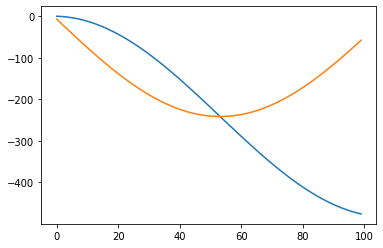

In [68]:
plt.plot(arc_trace_centered(-torch.tensor(7),torch.tensor(torch.pi/8),100).numpy())

In [71]:
def arc_trace_plot(velocity, rudder_angle, time_step, resolution=1):
    arc_trace_numpy = arc_trace_centered(velocity, rudder_angle, time_step, resolution).numpy()
    arc_trace_x = arc_trace_numpy[:,0]
    arc_trace_y = arc_trace_numpy[:,1]
    plt.plot(arc_trace_x, arc_trace_y)

/tmp/ipykernel_1459/423375982.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  assert torch.abs(torch.tensor(rudder_angle)) <= torch.pi/4, "abs(rudder_angle) must be <= pi/4"
/tmp/ipykernel_1459/423375982.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  assert torch.abs(torch.tensor(rudder_angle)) <= torch.pi/4, "abs(rudder_angle) must be <= pi/4"


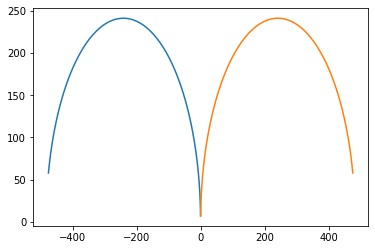

In [77]:
arc_trace_plot(torch.tensor(7),torch.tensor(torch.pi/8),100)
arc_trace_plot(torch.tensor(7),-torch.tensor(torch.pi/8),100)

/tmp/ipykernel_1459/423375982.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  assert torch.abs(torch.tensor(rudder_angle)) <= torch.pi/4, "abs(rudder_angle) must be <= pi/4"


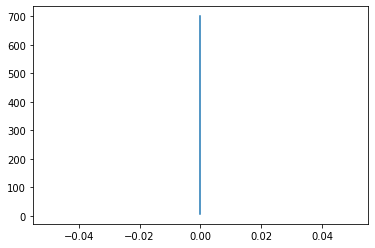

In [76]:
arc_trace_plot(torch.tensor(7),torch.tensor(0),100)